<IPython.core.display.Javascript object>


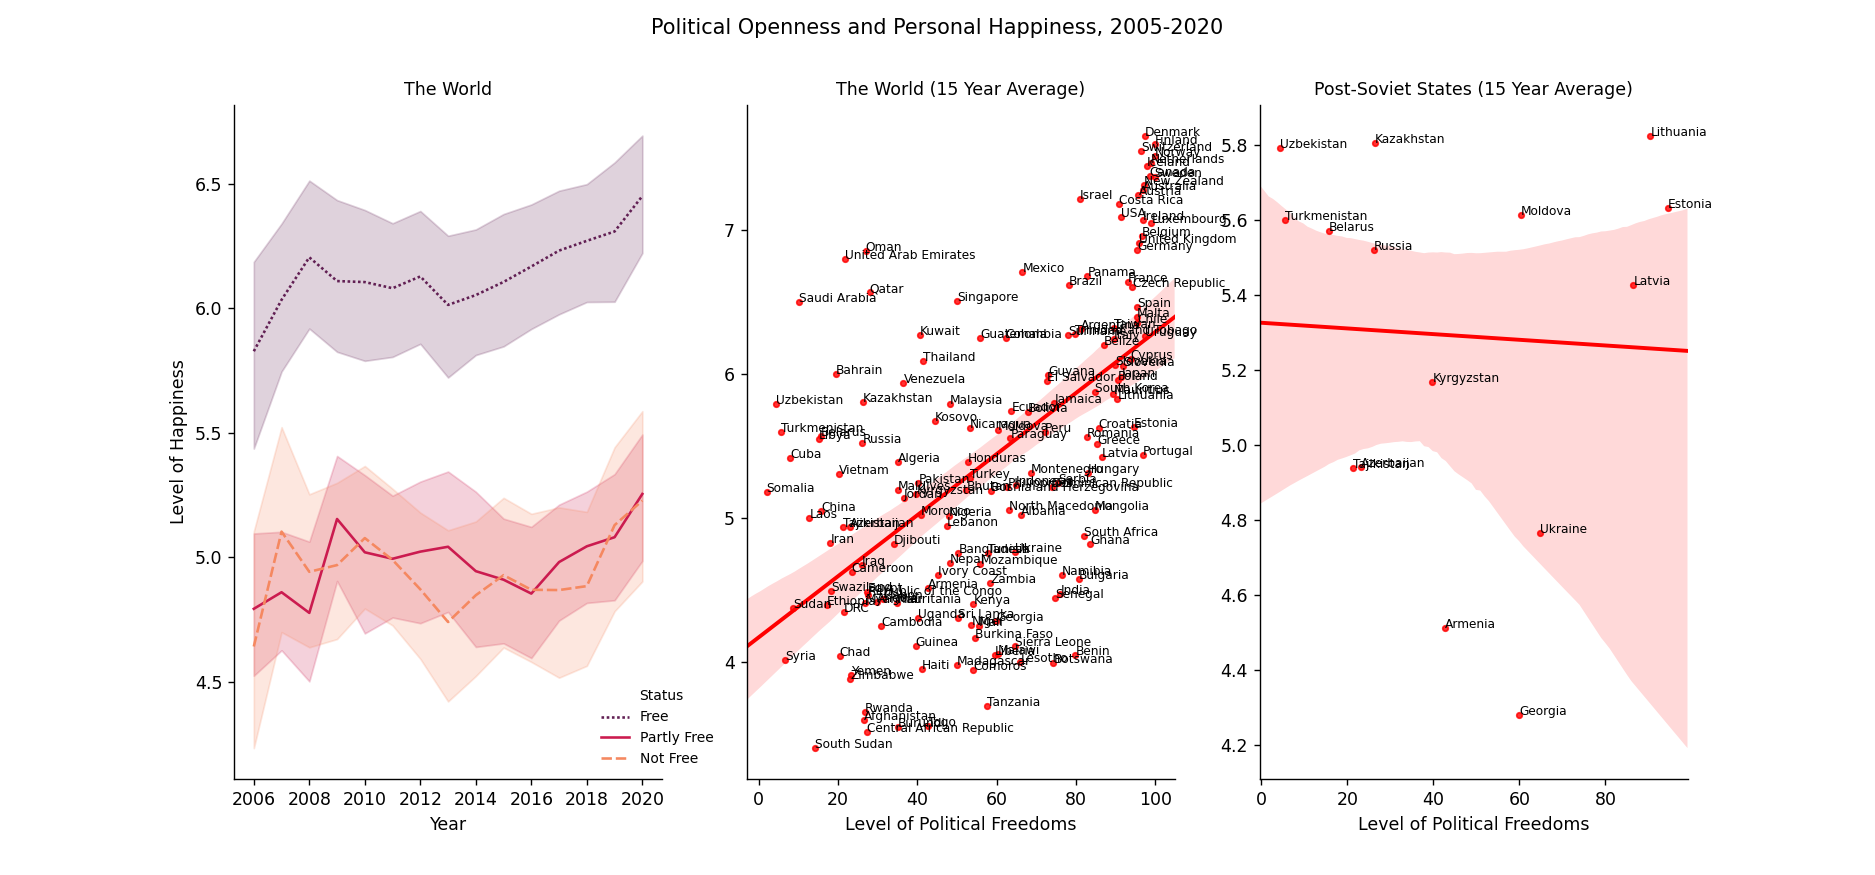

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
pd.options.mode.chained_assignment = None
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import pearsonr
from matplotlib.transforms import BlendedGenericTransform
%matplotlib notebook

def regime():
    
    #Global Happiness Data
    
    df=pd.read_csv("C:\\Users\\14024\\Desktop\\Data.csv")
    
    df.rename(columns={'Country name':'Country'}, inplace=True)
    df.rename(columns={'year':'Year'}, inplace=True)
    df.rename(columns={'Life Ladder':'Life_Ladder'}, inplace=True)
    
    # remove unrecognized entities 
    #df = df[np.logical_not(df['Country'].isin(['Hong Kong S.A.R. of China']))]
    #df = df[np.logical_not(df['Country'].isin(['Palestinian Territories']))]
    #df = df[np.logical_not(df['Country'].isin(['Somaliland region']))]
    #df = df[np.logical_not(df['Country'].isin(['North Cyprus']))]
    
    
    df['Country'] = df['Country'].apply(lambda x: x.replace('Congo (Brazzaville)', 'Republic of the Congo'))
    df['Country'] = df['Country'].apply(lambda x: x.replace('Congo (Kinshasa)', 'DRC'))
    df['Country'] = df['Country'].apply(lambda x: x.replace('Taiwan Province of China', 'Taiwan'))
    df['Country'] = df['Country'].apply(lambda x: x.replace('United States', 'USA'))
    
    
    
    #return df.iloc[380] Rep Congo
    #return df.iloc[380] DRC
    
    #Freedom House Data
    df1=pd.read_csv("C:\\Users\\14024\\Desktop\\Aggregate_Category_and_Subcategory_Scores_FIW_2003-2021.csv")
    #return df1.head()
    del df1['Region']
    del df1['C/T?']
    df1 = df1[['Country/Territory', 'Edition','Status',"Total"]]
    df1.rename(columns={'Country/Territory':'Country'}, inplace=True)
    df1.rename(columns={'Edition':'Year'}, inplace=True)
    
    df1.sort_values(by=['Country','Year', 'Status'], inplace=True)
    df1 = df1.reset_index(drop=True)
    #df1 = df1[np.logical_not(df1['Country'].isin(['Abkhazia','Crimea','Gaza Strip','West Bank', 'Eastern Donbas',
                                                 #'Pakistani Kashmir', 'Indian Kashmir','Somaliland','Tibet','Transnistria',
                                                  #'Nagorno-Karabakh','Northern Cyprys','South Ossetia','Western Sahara',"Hong Kong"]))]
    
    df1['Country'] = df1['Country'].apply(lambda x: x.replace( "Cote d'Ivoire", "Ivory Coast"))
    df1['Country'] = df1['Country'].apply(lambda x: x.replace('United States', 'USA'))
    df1['Country'] = df1['Country'].apply(lambda x: x.replace('Congo (Brazzaville)', 'Republic of the Congo'))
    df1['Country'] = df1['Country'].apply(lambda x: x.replace('Congo (Kinshasa)', 'DRC'))
    
    #return df1.head()
    #mean_happy=df1.groupby(["Country"]).agg({"Life_Ladder": "mean"})
    
    
    #return mean_happy.head(20)
    # VDEM data
    
    #vdem=pd.read_csv("C:\\Users\\14024\\Desktop\\V-Dem-CY-Core-v11.1.csv")
    
    #vdem=vdem[vdem["year"]>2004]
    #vdem=vdem[vdem["year"]<2021]
    #vdem1 = vdem[['country_name', 'year','v2x_polyarchy']]
    #vdem1.rename(columns={'country_name':'Country'}, inplace=True)
    #vdem1.rename(columns={'year':'Year'}, inplace=True)
    #vdem1.rename(columns={'v2x_polyarchy':'Dem_Score'}, inplace=True)
    #vdem1.sort_values(by=['Country','Year', "Dem_Score"], inplace=True)
    #vdem1 = vdem1.reset_index(drop=True)
    #vdem1['Country'] = vdem1['Country'].apply(lambda x: x.replace('Palestine/West Bank', 'Palestinian Territories'))
    #vdem1['Country'] = vdem1['Country'].apply(lambda x: x.replace('Burma/Myanmar', 'Myanmar'))
   
    #mean_vdem=vdem1.groupby(["Country"]).agg({"Dem_Score": "mean"})
    #return mean_vdem.head()

    df3=[df, df1]
    df3=reduce(lambda left,right: pd.merge(left, right, on=["Country","Year"], how="inner"), df3)
    #data.reset_index(level=['Country'], inplace=True)
    mapping = {'F':'Free','PF':'Partly Free','NF':'Not Free'}
    df3['Status'] = df3['Status'].map(mapping)
    #return df3.head(50)
   

    mean_free=df3.groupby(["Country"]).agg({"Total": "mean"})
    mean_happy=df3.groupby(["Country"]).agg({"Life_Ladder": "mean"})
    mean_gdp=df3.groupby(["Country"]).agg({"Log GDP per capita": "mean"})
    mean_socsup=df3.groupby(["Country"]).agg({"Social support": "mean"})
    mean_lifex=df3.groupby(["Country"]).agg({"Healthy life expectancy at birth": "mean"})
    mean_freechoice=df3.groupby(["Country"]).agg({"Freedom to make life choices": "mean"})
    mean_generosity=df3.groupby(["Country"]).agg({"Generosity": "mean"})
    mean_corrupt=df3.groupby(["Country"]).agg({"Perceptions of corruption": "mean"})
    
    df4=[mean_happy, mean_free,mean_gdp, mean_socsup, mean_lifex,mean_freechoice, mean_generosity, mean_corrupt]
    df4=reduce(lambda left,right: pd.merge(left, right, on="Country", how="inner"), df4)
    #data1.reset_index(level=['Country'], inplace=True)
   
    #return data1.head()
    
    criteria = [df4['Total'].between(65, 100), df4['Total'].between(29, 72), df4['Total'].between(0, 36)]
    values = ["Free", "Partly Free", "Not Free"]

    df4['Status'] = np.select(criteria, values, 0)
    df4.reset_index(level=0, inplace=True)
    #return df4.head()
    #Afghanistan = data.query("Life_Ladder < 2.5")
    #return Saddest_Country
    #Denmark=data.query("Life_Ladder > 7.99")
    #return Happy
    
    # Post-Soviet Countries Only
    df5 = df3.set_index('Country')
    df6=df5.loc[['Uzbekistan', "Tajikistan","Kyrgyzstan","Turkmenistan","Kazakhstan",
                    "Azerbaijan", "Armenia", "Georgia",
                   "Ukraine","Belarus","Russia","Moldova",
                   "Estonia","Latvia","Lithuania"]] 
    df6.reset_index(level=0, inplace=True)
    mean_free=df6.groupby(["Country"]).agg({"Total": "mean"})
    mean_happy=df6.groupby(["Country"]).agg({"Life_Ladder": "mean"})
    mean_gdp=df6.groupby(["Country"]).agg({"Log GDP per capita": "mean"})
    mean_socsup=df6.groupby(["Country"]).agg({"Social support": "mean"})
    mean_lifex=df6.groupby(["Country"]).agg({"Healthy life expectancy at birth": "mean"})
    mean_freechoice=df6.groupby(["Country"]).agg({"Freedom to make life choices": "mean"})
    mean_generosity=df6.groupby(["Country"]).agg({"Generosity": "mean"})
    mean_corrupt=df6.groupby(["Country"]).agg({"Perceptions of corruption": "mean"})
    
    df6=[mean_happy, mean_free,mean_gdp, mean_socsup, mean_lifex,mean_freechoice, mean_generosity, mean_corrupt]
    df6=reduce(lambda left,right: pd.merge(left, right, on="Country", how="inner"), df6)
    df6.reset_index(level=0, inplace=True)
    
    
    
    #return df6.head()
    
    #fig, axs = plt.subplots(figsize=(11,6))
    #fig.suptitle("Political Openness and Personal Happiness, 2005-2020")
    #sns.lineplot(x='Year', y='Life_Ladder',data=df6, hue="Country",ax=axs)
    #axs.set(xlabel="Year", ylabel = "Level of Happiness (Low to High)")
    #axs.legend(loc=4,frameon=False,bbox_to_anchor=(0.45,0.0,0.7,0.8), fontsize="8")
    #axs.spines["top"].set_visible(False)
    #axs.spines["right"].set_visible(False)
    
    #marker = ["3","4",'o', 'x', '^',">","<", '+', '*', '8', 's', 'p', "P",'D', '1']
    #markers = [marker[i] for i in range(len(df6["Country"].unique()))]

    #sns.lineplot(x='Year', y='Life_Ladder', data=df6, hue='Country',markers=True, dashes=False)
    
    
    #return plt.show(); 
    #return df4.head()


    
    
    
    
    # Create a scatter plot
    
    fig, (ax1,ax2, ax3) = plt.subplots(1, 3,figsize=(15,7))
    fig.suptitle("Political Openness and Personal Happiness, 2005-2020",fontsize=12)
    #sns.lmplot( x='Year', y='Life_ladder', hue='Status', scatter=False, data=df3)
    sns.lineplot(x='Year', y='Life_Ladder', data=df3, ax=ax1,hue="Status", style="Status",palette="rocket", hue_order = ['Free', 'Partly Free', 'Not Free'])
    
    
    ax1.set(xlabel="Year", ylabel = "Level of Happiness")
    ax1.set_title('The World', size=10)
    ax1.legend(loc=4,frameon=False,bbox_to_anchor=(0.45,0.0,0.7,0.8), fontsize="8")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    
    #sns.lineplot( x='total_bill', y='tip', hue='smoker',  data=tips, legend=False)
    
    
    
    
    
    #ax1 = sns.countplot(x="Column", data=ds)

    #ax1.set_xticklabels(ax1.get_xticklabels("Year"), rotation=40, ha="right")
    
   
    p1=sns.regplot(x='Total', y='Life_Ladder',data=df4, ax=ax2, color="red", scatter_kws={'s':10})
    #ax2.axhline(5.407726,ls='--', color="black")
    ax2.set(xlabel="Level of Political Freedoms", ylabel = "")
    ax2.set_title('The World (15 Year Average)', size=10)
    ax2.legend(loc=4,frameon=False,bbox_to_anchor=(0.5,0.029,0.7,0.8), fontsize="8")
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    
    for line in range(0,df4.shape[0]):
        p1.text(df4.Total[line]+0.01, df4.Life_Ladder[line], 
     df4.Country[line], horizontalalignment='left', 
     size=7, color='black')
    
    
    #def label_point(x, y, val, sns):
        #a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        #for i, point in a.iterrows():
            #sns.text(point['x']+.02, point['y'], str(point['val']),size=7)
    #label_point(df4["Total"], df4["Life_Ladder"], df4["Country"], plt.gca())  
    
    sns.regplot(x='Total', y='Life_Ladder', data=df6, ax=ax3,color="red", scatter_kws={'s':10})
    #ax3.axhline(5.407726,ls='--', color="red")
    #ax3.text(1,5.4, "Mean Happiness", color="red")
    #ax3.annotate('mean happiness', xy=(0, 5.407726),xytext=(0,5),arrowprops=dict(arrowstyle='->', color='black'))
    
    ax3.set(xlabel="Level of Political Freedoms", ylabel = "")
    ax3.set_title('Post-Soviet States (15 Year Average)',size=10)
    ax3.legend(loc=4,frameon=False,bbox_to_anchor=(0.5,0.029,0.7,0.8), fontsize="9")
    ax3.spines["top"].set_visible(False)
    ax3.spines["right"].set_visible(False)
    def label_point(x, y, val, sns):
        b = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in b.iterrows():
            sns.text(point['x']+.02, point['y'], str(point['val']),size=7)
    label_point(df6["Total"], df6["Life_Ladder"], df6["Country"], plt.gca())  
    #return df4.describe()  
    
    
    plt.show();   

regime()